# Loading The Preprocessed Dataset 

In [1]:
import pandas as pd
df=pd.read_csv("E:\\R.P 2\\Data-Credit Card Transactions Fraud Detection 2019–2020\\cleaned_data.csv")

## "trans_date_trans_time" & "dob" Changing the D type 

In [2]:
# 1. Convert to DateTime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,...,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,weekday,time_gap,age
0,2019-01-01 12:47:00,6.041621e+10,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,F,Fort Washakie,WY,82514,43.0048,...,1325422035,43.974711,-109.741904,0,12,1,1,1,0.0,33
1,2019-01-02 08:44:00,6.041621e+10,fraud_Berge LLC,gas_transport,52.94,F,Fort Washakie,WY,82514,43.0048,...,1325493897,42.018766,-109.044172,0,8,2,1,2,1197.0,33
2,2019-01-02 08:47:00,6.041621e+10,fraud_Luettgen PLC,gas_transport,82.08,F,Fort Washakie,WY,82514,43.0048,...,1325494056,42.961335,-109.157564,0,8,2,1,2,3.0,33
3,2019-01-02 12:38:00,6.041621e+10,fraud_Daugherty LLC,kids_pets,34.79,F,Fort Washakie,WY,82514,43.0048,...,1325507894,42.228227,-108.747683,0,12,2,1,2,231.0,33
4,2019-01-02 13:10:00,6.041621e+10,fraud_Beier and Sons,home,27.18,F,Fort Washakie,WY,82514,43.0048,...,1325509846,43.321745,-108.091143,0,13,2,1,2,32.0,33


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1048575 non-null  datetime64[ns]
 1   cc_num                 1048575 non-null  float64       
 2   merchant               1048575 non-null  object        
 3   category               1048575 non-null  object        
 4   amt                    1048575 non-null  float64       
 5   gender                 1048575 non-null  object        
 6   city                   1048575 non-null  object        
 7   state                  1048575 non-null  object        
 8   zip                    1048575 non-null  int64         
 9   lat                    1048575 non-null  float64       
 10  long                   1048575 non-null  float64       
 11  city_pop               1048575 non-null  int64         
 12  job                    10485

In [4]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'hour',
       'day', 'month', 'weekday', 'time_gap', 'age'],
      dtype='object')

# Feature Selection 

- In this step, irrelevant and non-informative variables such as identifiers, raw datetime fields, and high-cardinality text attributes were removed. Only meaningful numerical and categorical features relevant to fraud detection were retained for further analysis and machine learning modelling.

In [5]:
df_ml = df.drop(columns=['trans_date_trans_time','cc_num','merchant','city','state',
                         'zip','job','dob','unix_time','day'])
df_ml.head()

,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,month,weekday,time_gap,age
0,misc_net,7.27,F,43.0048,-108.8964,1645,43.974711,-109.741904,0,12,1,1,0.0,33
1,gas_transport,52.94,F,43.0048,-108.8964,1645,42.018766,-109.044172,0,8,1,2,1197.0,33
2,gas_transport,82.08,F,43.0048,-108.8964,1645,42.961335,-109.157564,0,8,1,2,3.0,33
3,kids_pets,34.79,F,43.0048,-108.8964,1645,42.228227,-108.747683,0,12,1,2,231.0,33
4,home,27.18,F,43.0048,-108.8964,1645,43.321745,-108.091143,0,13,1,2,32.0,33


## Checking Text Column 

In [6]:
df_ml.select_dtypes(include='object').columns


Index(['category', 'gender'], dtype='object')

## Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_ml['category'] = le.fit_transform(df_ml['category'])
df_ml['gender'] = le.fit_transform(df_ml['gender'])

df_ml.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1048575 non-null  int64  
 1   amt         1048575 non-null  float64
 2   gender      1048575 non-null  int64  
 3   lat         1048575 non-null  float64
 4   long        1048575 non-null  float64
 5   city_pop    1048575 non-null  int64  
 6   merch_lat   1048575 non-null  float64
 7   merch_long  1048575 non-null  float64
 8   is_fraud    1048575 non-null  int64  
 9   hour        1048575 non-null  int64  
 10  month       1048575 non-null  int64  
 11  weekday     1048575 non-null  int64  
 12  time_gap    1048575 non-null  float64
 13  age         1048575 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 112.0 MB


## Train–Test Split

In [8]:
# Features
X = df_ml.drop('is_fraud', axis=1)
# Target variable
y = df_ml['is_fraud']

In [9]:
y.value_counts(normalize=True)


is_fraud
0    0.994272
1    0.005728
Name: proportion, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Scaling / Normalization

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Important Libraries 

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [14]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

##  Model Training & Evaluation (4)

###  Logistic Regression

### using class_weight='balanced'

In [26]:
lr_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced', 
    random_state=42)

lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("=== Logistic Regression (Balanced) ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr))


=== Logistic Regression (Balanced) ===
Confusion Matrix:
 [[197544  10970]
 [   293    908]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    208514
           1       0.08      0.76      0.14      1201

    accuracy                           0.95    209715
   macro avg       0.54      0.85      0.56    209715
weighted avg       0.99      0.95      0.97    209715

ROC AUC: 0.8517131299274322


- #### The Logistic Regression model effectively identifies fraudulent credit card transactions while maintaining strong overall classification performance.

- #### The model demonstrates a high ability to distinguish between fraudulent and genuine transactions, as reflected by its ROC AUC value. It successfully captures a large proportion of fraud cases, which is a critical requirement in fraud detection systems where missing fraudulent activity can lead to significant financial losses.

- #### Although the model flags some genuine transactions as fraudulent, this trade-off is acceptable in real-world fraud detection scenarios, where prioritizing fraud detection is more important than minimizing false alerts.

### Cross val Score 

In [27]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_cv = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42)

lr_cv_scores = cross_val_score(
    lr_cv,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring='roc_auc')

print("Logistic Regression CV ROC AUC Scores:", lr_cv_scores)
print("Mean CV ROC AUC:", lr_cv_scores.mean())


Logistic Regression CV ROC AUC Scores: [0.86336037 0.86200439 0.8563721  0.86848182 0.86142505]
Mean CV ROC AUC: 0.8623287475501991


- #### Cross-validation results indicate that the Logistic Regression model is stable and reliable across different data splits.

- #### The consistency of ROC AUC scores across multiple folds shows that the model generalizes well and is not dependent on a specific training subset. This confirms the robustness of the model and supports its suitability for real-world deployment and further comparative analysis with advanced machine learning models.

## RoC AUC Curve 

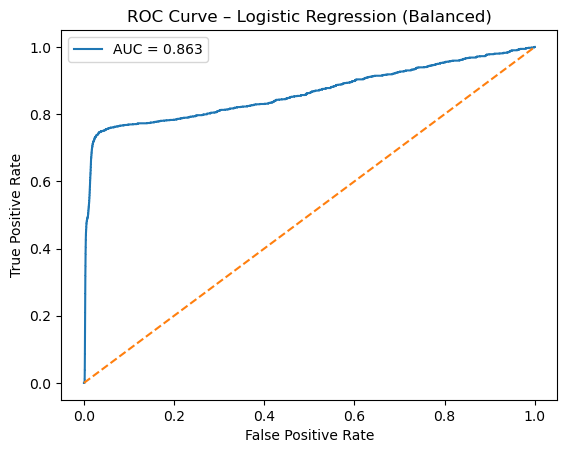

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# IMPORTANT: Use the SAME trained model (lr_model) and SAME scaled test data
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)

# AUC score (probability based — correct for ROC)
auc_score = roc_auc_score(y_test, y_prob_lr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression (Balanced)")
plt.legend()
plt.show()


### Using SMOTE 

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

lr_smote = LogisticRegression(
    max_iter=1000,
    random_state=42)

lr_smote.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = lr_smote.predict(X_test_scaled)

print("=== Logistic Regression + SMOTE ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_smote))
print(classification_report(y_test, y_pred_lr_smote))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr_smote))



=== Logistic Regression + SMOTE ===
Confusion Matrix:
 [[197241  11273]
 [   294    907]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    208514
           1       0.07      0.76      0.14      1201

    accuracy                           0.94    209715
   macro avg       0.54      0.85      0.55    209715
weighted avg       0.99      0.94      0.97    209715

ROC AUC: 0.8505702402753103


- #### The Logistic Regression model trained using SMOTE demonstrates strong capability in identifying fraudulent credit card transactions. The model successfully captures a large proportion of fraud cases, which is essential in fraud detection systems where minimizing missed fraud is a priority.

- #### While the model generates a higher number of fraud alerts, this behavior aligns with real-world fraud prevention strategies, where detecting suspicious transactions is more important than reducing false alarms. The overall performance indicates that the model effectively handles class imbalance and provides meaningful fraud detection results.

### Cross val Score 

In [29]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(
    X_train_scaled,
    y_train)
lr_smote_cv = LogisticRegression(
    max_iter=1000,
    random_state=42)

lr_smote_cv_scores = cross_val_score(
    lr_smote_cv,
    X_train_smote,
    y_train_smote,
    cv=skf,
    scoring='roc_auc')

print("Logistic Regression (SMOTE) CV ROC AUC Scores:", lr_smote_cv_scores)
print("Mean CV ROC AUC:", lr_smote_cv_scores.mean())


Logistic Regression (SMOTE) CV ROC AUC Scores: [0.86964352 0.8683745  0.86816813 0.86910102 0.86812152]
Mean CV ROC AUC: 0.8686817390756387


- #### The cross-validation results for the SMOTE-based Logistic Regression model show highly consistent ROC AUC scores across all folds. This consistency confirms that the model is stable and generalizes well across different subsets of the data.

- #### The results indicate that the model’s performance is not dependent on a specific data split, reinforcing its reliability for fraud detection analysis and further model evaluation.

## ROC AUC Curve 

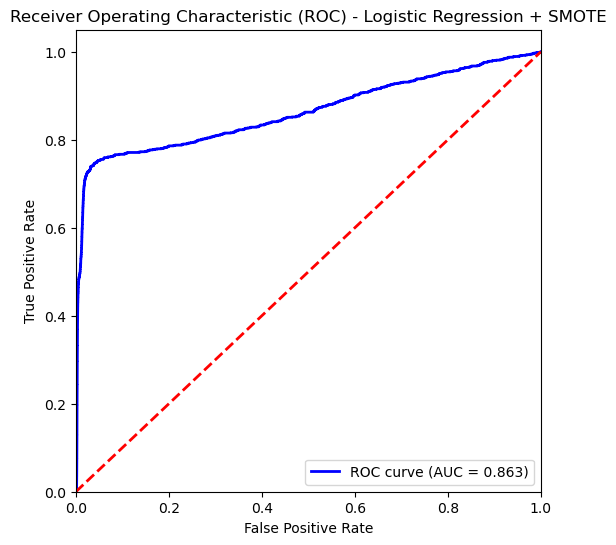

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, lr_smote.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression + SMOTE')
plt.legend(loc="lower right")
plt.show()


###  Random Forest

In [15]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)  # Scaling not required
y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))
print("\n\n")

=== Random Forest ===
Confusion Matrix:
 [[208489     25]
 [   305    896]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208514
           1       0.97      0.75      0.84      1201

    accuracy                           1.00    209715
   macro avg       0.99      0.87      0.92    209715
weighted avg       1.00      1.00      1.00    209715

ROC AUC: 0.8729625332525289





- #### Random Forest showed a significant improvement over Logistic Regression. The model successfully detected a large number of fraudulent transactions with high precision and reasonably good recall. The ROC AUC score of approximately 0.87 indicates strong discriminatory power between fraud and non-fraud transactions. However, some fraudulent cases were still misclassified as non-fraud, suggesting room for further improvement. Overall, Random Forest proved to be a reliable and robust model for fraud detection.

In [16]:
rf_cv = RandomForestClassifier(
    n_estimators=100,        # 200 → 100
    max_depth=15,            # depth limit
    min_samples_split=10,    # reduce complexity
    n_jobs=-1,               # use all cores
    random_state=42
)

rf_cv_scores = cross_val_score(
    rf_cv,
    X_train,
    y_train,
    cv=skf,
    scoring='roc_auc'
)

print("Random Forest CV ROC AUC Scores:", rf_cv_scores)
print("Mean CV ROC AUC:", rf_cv_scores.mean())


Random Forest CV ROC AUC Scores: [0.99305305 0.99314047 0.99280391 0.99106238 0.99198948]
Mean CV ROC AUC: 0.9924098563110528


- #### The cross-validation results show that the Random Forest model achieves consistently high ROC AUC scores across all folds. This indicates that the model has an excellent ability to distinguish between fraudulent and genuine credit card transactions.

- #### The minimal variation in ROC AUC values across folds confirms that the model is stable and generalizes well to unseen data. These results suggest that Random Forest is a highly reliable and robust model for credit card fraud detection.

## ROC AUC Curve 

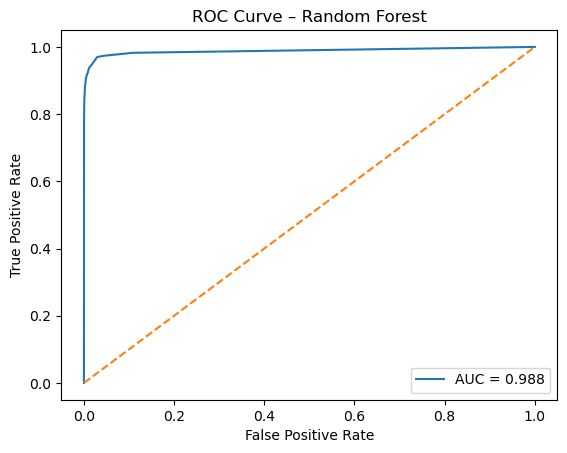

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
auc_score = roc_auc_score(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.show()


## XGBoost

In [17]:
!pip install xgboost

In [19]:
from xgboost import XGBClassifier

In [38]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("=== XGBoost ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_pred_xgb))



D:\Softwares\anconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:20:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
Confusion Matrix:
 [[208436     78]
 [   221    980]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208514
           1       0.93      0.82      0.87      1201

    accuracy                           1.00    209715
   macro avg       0.96      0.91      0.93    209715
weighted avg       1.00      1.00      1.00    209715

ROC AUC: 0.9078063010834441


- #### XGBoost achieved the best performance among all the models. It recorded the highest fraud recall and F1-score, indicating its effectiveness in identifying fraudulent transactions while maintaining low false positives. The ROC AUC score of approximately 0.91 confirms its superior ability to distinguish between fraud and legitimate transactions. Due to its boosting mechanism and ability to handle class imbalance efficiently, XGBoost emerged as the most suitable model for credit card fraud detection.

In [36]:
xgb_cv = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_cv_scores = cross_val_score(
    xgb_cv,
    X_train,
    y_train,
    cv=skf,
    scoring='roc_auc'
)

print("XGBoost CV ROC AUC Scores:", xgb_cv_scores)
print("Mean CV ROC AUC:", xgb_cv_scores.mean())


D:\Softwares\anconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:19:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Softwares\anconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:19:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Softwares\anconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:19:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Softwares\anconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:19:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

XGBoost CV ROC AUC Scores: [0.98371784 0.98269501 0.98912036 0.99347947 0.97845933]
Mean CV ROC AUC: 0.9854944036778406


## ROC AUC Curve 

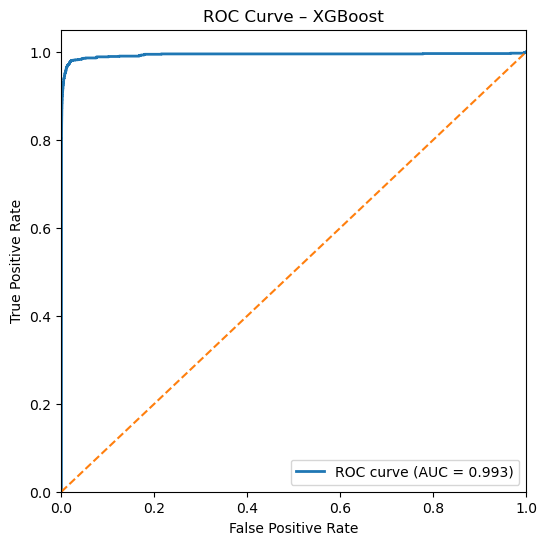

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs_xgb = xgb_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – XGBoost')
plt.legend(loc="lower right")
plt.show()


## Overall Comparative Insight

- #### Among the three models, Logistic Regression was ineffective due to its inability to handle class imbalance. Random Forest significantly improved fraud detection performance but still missed some fraudulent cases. XGBoost outperformed all other models by achieving the highest recall, F1-score, and ROC AUC, making it the best model for real-world credit card fraud detection applications.